In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from tqdm import tqdm
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [3]:
from gorkov_model import AcousticPT

### Figures for thesis

### $F_{ac}$ vs $W$

In [ ]:
a_values = np.arange(10,100,5)*1e-6
results = {}
z_h = 4e-2
nx=3
ny=3
nz=1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=2e7, h=z_h, f=0.1e6, material='latex',n_points=100)
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)

In [4]:
a_values = np.arange(10,100,5)*1e-6
results = {}
z_h = 4e-3
nx=3
ny=3
nz=1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=1e6, h=z_h, f=1.49e6, material='latex',n_points=100)
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)
F_max = []
Weight = []
min_pow = []
F_hat_arr = []
for a in results.keys():
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    W_rel = B-W   #[N]
    x_plane_d = d/(2*nx)
    y_plane_d = d/(2*ny)
    z_plane_d = h/(nz)
    y_plane, x_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    
    fz = r.model['results']['total'][2][x_plane,y_plane,:]
    F_max.append(r.model['results']['total'][2].max())
    Weight.append(abs(W_rel))

    F_hat = abs(r.model['results']['total'][2]/PA).max()    #[F/P]
    vin =r.param['Vin']
    A = r.param['A_trans']
    P_min = abs(W_rel)*power/F_hat  #[Imin]
    pres_min = P_min/(A*vin)

    F_hat_arr.append(F_hat)
    min_pow.append(P_min)

1004.6979865771812
95301979.92342696


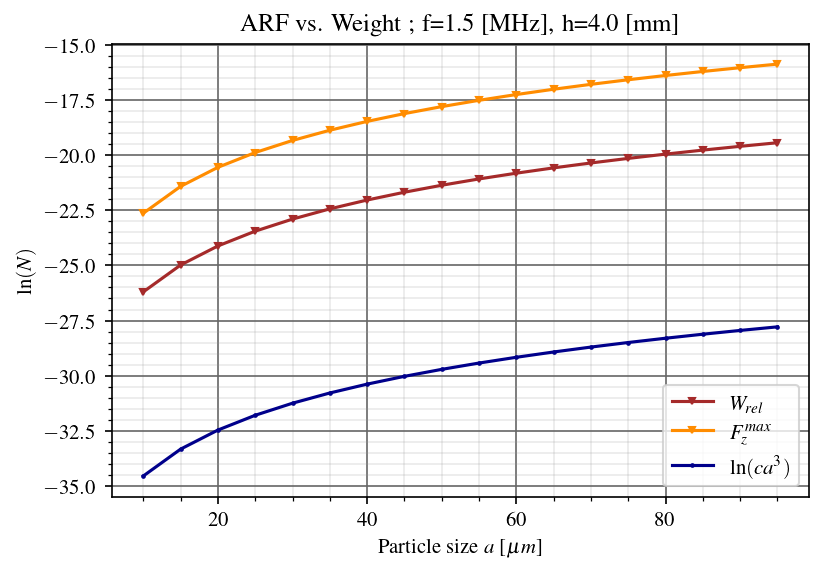

In [5]:
f = results[10].model['parameters']['f']
h = results[10].model['parameters']['h']
med = results[10].model['parameters']['medium']

mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
plt.rcParams['figure.dpi'] = (150)
c = results[10].mediums_velocity[med]
lambda_m = c/f
conf = 1e-1
a_max = lambda SR,c0,f: SR*c0/(2*np.pi*f)
a_lim = a_max(0.1,c,0.25*1e6)*1e6
print(lambda_m*1e6)
mpl.rc('text', usetex=True)
print(a_lim*1e6)
plt.plot(a_values*1e6,np.log(np.array(Weight)), marker='v', c='brown', label='$W_{rel}$',ms=2.5)
plt.plot(a_values*1e6, np.log(np.array(F_max)), marker='v',c='darkorange', label='$F_z^{max}$',ms=2.5)
plt.plot(a_values*1e6,np.log(np.array(a_values)**3), '.-', c='darkblue', label='$\ln(ca^3)$',ms=2.5)
# plt.plot([a_lim,a_lim],[np.log(np.array(a_values)**3).min(),np.log(np.array(Weight)).max()], '--',c='black', label='SR')
plt.xlabel('Particle size $a$ [$\mu m$]')
plt.ylabel('$\ln(N)$')
plt.title(f'ARF vs. Weight ; f={np.round(f*1e-6,1)} [MHz], h={h*1e3} [mm]')
plt.legend()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()  
plt.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/arf_vs_w_1.png'), bbox_inches='tight')

14970.0
238254949.80856732


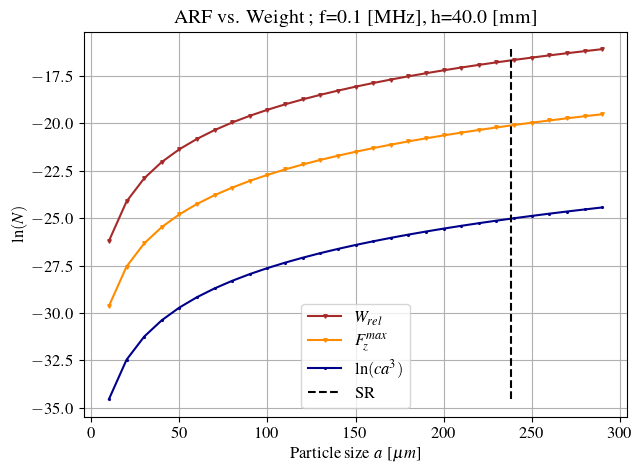

In [ ]:
f = results[10].model['parameters']['f']
h = results[10].model['parameters']['h']
med = results[10].model['parameters']['medium']
c = results[10].mediums_velocity[med]
lambda_m = c/f
conf = 1e-1
a_lim = 1e6*lambda_m*conf/(np.pi*2)
print(lambda_m*1e6)
print(a_lim*1e6)
plt.plot(a_values*1e6,np.log(np.array(Weight)), marker='v', c='brown', label='$W_{rel}$',ms=2.5)
plt.plot(a_values*1e6, np.log(np.array(F_max)), marker='v',c='darkorange', label='$F_z^{max}$',ms=2.5)
plt.plot(a_values*1e6,np.log(np.array(a_values)**3), '.-', c='darkblue', label='$\ln(ca^3)$',ms=2.5)
plt.plot([a_lim,a_lim],[np.log(np.array(a_values)**3).min(),np.log(np.array(Weight)).max()], '--',c='black', label='SR')
plt.xlabel('Particle size $a$ [$\mu m$]')
plt.ylabel('$\ln(N)$')
plt.title(f'ARF vs. Weight ; f={np.round(f*1e-6,1)} [MHz], h={h*1e3} [mm]')
plt.legend()
plt.grid()
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/arf_vs_w_1.png'), bbox_inches='tight')

In [ ]:
a_values = np.arange(0.1,10,0.1)*1e-6
results = {}
z_h = 1e-3
xy_d = 1e-3
nx=3
ny=3
nz=1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=2e7, h=z_h, l =xy_d, material='latex',n_points=100)
    r_i = [0,0,0]
    r_f = [xy_d,xy_d,z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)

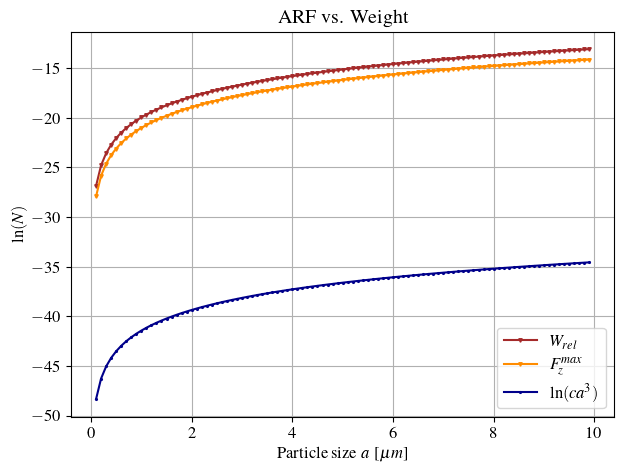

In [ ]:
plt.plot(a_values*1e6,np.log(np.array(Weight)), marker='v', c='brown', label='$W_{rel}$',ms=2.5)
plt.plot(a_values*1e6, np.log(np.array(F_max)), marker='v',c='darkorange', label='$F_z^{max}$',ms=2.5)
plt.plot(a_values*1e6,np.log(np.array(a_values)**3), '.-', c='darkblue', label='$\ln(ca^3)$',ms=2.5)
plt.xlabel('Particle size $a$ [$\mu m$]')
plt.ylabel('$\ln(N)$')
plt.title('ARF vs. Weight')
plt.legend()
plt.grid()

In [ ]:
#medium params 
c0 = 1497 #m/s
rho0 = 998 #kg/m3
k0 = 1/(rho0 * (c0**2))
#other param
g =  9.81 #m/s
Gp = 0.0006 
Pa = 1e6
rhop = 1100 #kg/m3
def Gamma (rhop_):
    rhohat = rhop_/rho0
    return 4*g*rhop_*((1/rhohat) - 1)
def Lambda(rhop_):
    rhohat = rhop_/rho0
    Phi =((5*rhohat - 2)/ 2*rhohat + 1) - 1/(Gp*k0)
    return (Pa**2)*k0* Phi

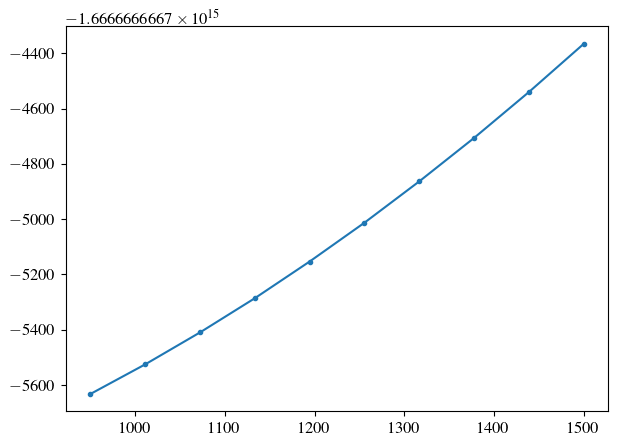

In [ ]:
r = np.linspace(950,1500,10)
# plt.plot(r, -Gamma(r), '.-')
plt.plot(r, Lambda(r), '.-')

In [ ]:
a_values = np.arange(10,100,5)*1e-6
results = {}
z_h = 4e-2
nx=3
ny=3
nz=1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=2e7, h=z_h, f=0.25e6, material='sillica',n_points=100)
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)
F_max = []
Weight = []
min_pow = []
F_hat_arr = []
for a in results.keys():
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    W_rel = B-W   #[N]
    x_plane_d = d/(2*nx)
    y_plane_d = d/(2*ny)
    z_plane_d = h/(nz)
    y_plane, x_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    
    fz = r.model['results']['total'][2][x_plane,y_plane,:]
    F_max.append(fz.max())
    Weight.append(abs(W_rel))

    F_hat = abs(r.model['results']['total'][2]/PA).max()    #[F/P]
    vin =r.param['Vin']
    A = r.param['A_trans']
    P_min = abs(W_rel)*power/F_hat  #[Imin]
    pres_min = P_min/(A*vin)

    F_hat_arr.append(F_hat)
    min_pow.append(P_min)
f = results[10].model['parameters']['f']
h = results[10].model['parameters']['h']
med = results[10].model['parameters']['medium']
c = results[10].mediums_velocity[med]
lambda_m = c/f
conf = 1e-1
a_lim = 1e6*lambda_m*conf/(np.pi*2)
print(lambda_m*1e6)
print(a_lim*1e6)
plt.plot(a_values*1e6,np.log(np.array(Weight)), marker='v', c='brown', label='$W_{rel}$',ms=2.5)
plt.plot(a_values*1e6, np.log(np.array(F_max)), marker='v',c='darkorange', label='$F_z^{max}$',ms=2.5)
plt.plot(a_values*1e6,np.log(np.array(a_values)**3), '.-', c='darkblue', label='$\ln(ca^3)$',ms=2.5)
plt.plot([a_lim,a_lim],[np.log(np.array(a_values)**3).min(),np.log(np.array(Weight)).max()], '--',c='black', label='SR')
plt.xlabel('Particle size $a$ [$\mu m$]')
plt.ylabel('$\ln(N)$')
plt.title(f'ARF vs. Weight ; f={np.round(f*1e-6,1)} [MHz], h={h*1e3} [mm]')
plt.legend()
plt.grid()
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/arf_vs_w_1.png'), bbox_inches='tight')

KeyError: 'Select a valid material. The allowed materials are: latex,sillica, glass, oil or liver'

7485.0
119127474.90428366


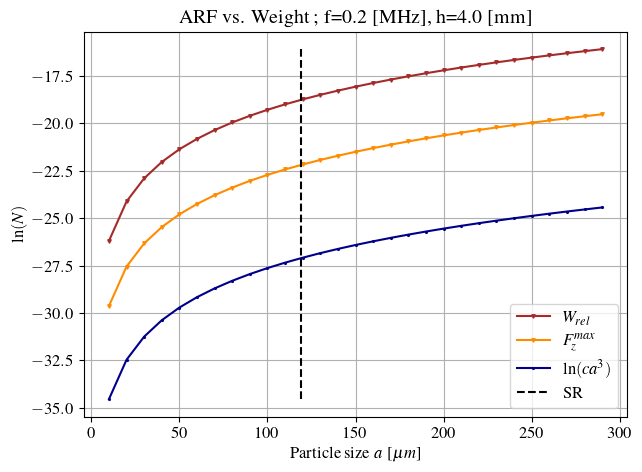

In [ ]:
a_values = np.arange(10,300,10)*1e-6
results = {}
z_h = 4e-3
nx=3
ny=3
nz=1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=2e7, h=z_h, f=2e5, material='latex',n_points=100)
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)
F_max = []
Weight = []
min_pow = []
F_hat_arr = []
for a in results.keys():
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    W_rel = B-W   #[N]
    
    fz = r.model['results']['total'][2][x_plane,y_plane,:]
    F_max.append(fz.max())
    Weight.append(abs(W_rel))

    F_hat = abs(r.model['results']['total'][2]/PA).max()    #[F/P]
    vin =r.param['Vin']
    A = r.param['A_trans']
    P_min = abs(W_rel)*power/F_hat  #[Imin]
    pres_min = P_min/(A*vin)

    F_hat_arr.append(F_hat)
    min_pow.append(P_min)
f = results[10].model['parameters']['f']
h = results[10].model['parameters']['h']
med = results[10].model['parameters']['medium']
c = results[10].mediums_velocity[med]
lambda_m = c/f
conf = 1e-1
a_lim = 1e6*lambda_m*conf/(np.pi*2)
print(lambda_m*1e6)
print(a_lim*1e6)
plt.plot(a_values*1e6,np.log(np.array(Weight)), marker='v', c='brown', label='$W_{rel}$',ms=2.5)
plt.plot(a_values*1e6, np.log(np.array(F_max)), marker='v',c='darkorange', label='$F_z^{max}$',ms=2.5)
plt.plot(a_values*1e6,np.log(np.array(a_values)**3), '.-', c='darkblue', label='$\ln(ca^3)$',ms=2.5)
plt.plot([a_lim,a_lim],[np.log(np.array(a_values)**3).min(),np.log(np.array(Weight)).max()], '--',c='black', label='SR')
plt.xlabel('Particle size $a$ [$\mu m$]')
plt.ylabel('$\ln(N)$')
plt.title(f'ARF vs. Weight ; f={np.round(f*1e-6,1)} [MHz], h={h*1e3} [mm]')
plt.legend()
plt.grid()
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/arf_vs_w_1.png'), bbox_inches='tight')

The minimum frequency required is: 0.05 [MHz]


C:\Users\Andrew S\AppData\Local\Temp\ipykernel_26424\450636607.py:4: RuntimeWarning: invalid value encountered in sqrt
  l = lambda nx,ny,nz,h,f: np.sqrt((nx**2 +ny**2)/((4*f**2)/c0**2 - (nz/h)**2))


Text(0.5, 1.0, '$d(f)$ ; $n_x$=3, $n_y$=3, $n_z$=1, $h$=4.0 $[mm]$')

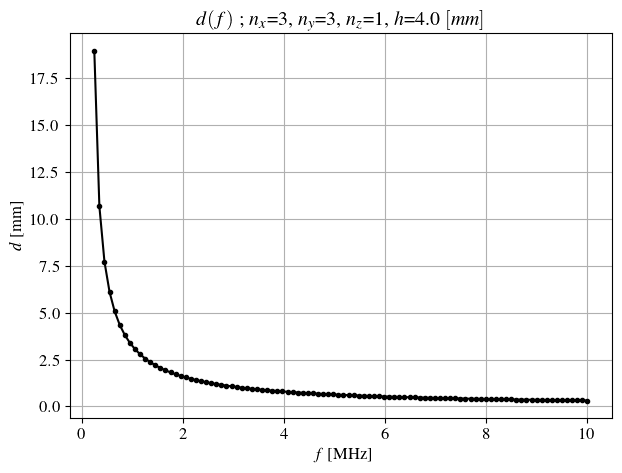

In [ ]:
nx,ny,nz=3,3,1
c0 = 1497 #m/s
h = 4e-3
l = lambda nx,ny,nz,h,f: np.sqrt((nx**2 +ny**2)/((4*f**2)/c0**2 - (nz/h)**2))
f_vec = np.linspace(0.5e5,1e7,100)
l_vec= l(nx,ny,nz,h,f_vec)
# l_vec = np.nan_to_num(l_vec,nan=0)
print('The minimum frequency required is:',np.round(f_vec[np.argmin(l_vec)]*1e-6,2), '[MHz]')
plt.plot(f_vec*1e-6,l_vec*1e3,'.-',c='black')
plt.xlabel('$f$ [MHz]')
plt.grid()
plt.ylabel('$d$ [mm]')
plt.title(f'$d(f)$ ; $n_x$={nx}, $n_y$={ny}, $n_z$={nz}, $h$={np.round(h*1e3,1)} $[mm]$')


In [ ]:
f_sr = lambda D,c0_ : (c0_/(D*np.pi))*1e-1
D_vec = np.array([100,75,50,25])*1e-6
f_sr_vec = f_sr(D_vec,c0)

In [ ]:
f_sr_vec

array([ 476509.89961713,  635346.53282285,  953019.79923427,
       1906039.59846854])

In [ ]:
50*(2*np.pi)/(500)

0.6283185307179586

In [ ]:
(2*np.pi*1.333/0.532)*50

787.1697382021041

In [ ]:
10/500

0.02

In [ ]:
sr = lambda a,f,c0: 2*np.pi*a*f/c0
for a in D_vec:
    for f in f_sr_vec:
        sr_v = sr(a,f,c0)
        print('aM:', np.round(a*1e6,1), 'f:', np.round(f*1e-6,3),'SR:', sr_v)

aM: 100.0 f: 0.477 SR: 0.2
aM: 100.0 f: 0.635 SR: 0.2666666666666667
aM: 100.0 f: 0.953 SR: 0.4
aM: 100.0 f: 1.906 SR: 0.8
aM: 75.0 f: 0.477 SR: 0.15
aM: 75.0 f: 0.635 SR: 0.2
aM: 75.0 f: 0.953 SR: 0.3
aM: 75.0 f: 1.906 SR: 0.6
aM: 50.0 f: 0.477 SR: 0.1
aM: 50.0 f: 0.635 SR: 0.13333333333333336
aM: 50.0 f: 0.953 SR: 0.2
aM: 50.0 f: 1.906 SR: 0.4
aM: 25.0 f: 0.477 SR: 0.05
aM: 25.0 f: 0.635 SR: 0.06666666666666668
aM: 25.0 f: 0.953 SR: 0.1
aM: 25.0 f: 1.906 SR: 0.2


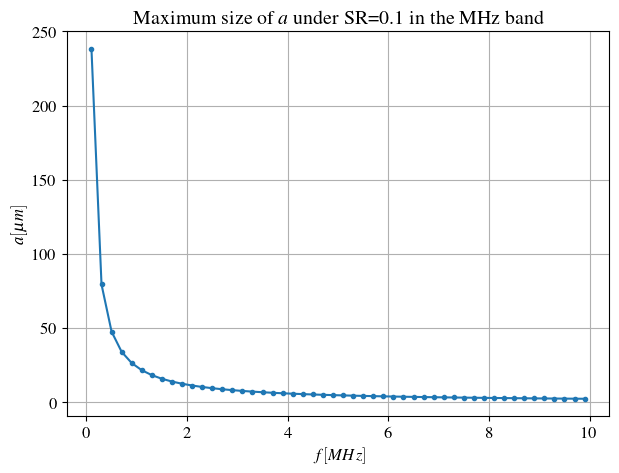

In [ ]:
a_max = lambda SR,c0,f: SR*c0/(2*np.pi*f)
f_vec = np.linspace(0.1,9.9,50)*1e6 #Hz
SR=0.1
a_vec_max = a_max(SR,c0,f_vec)
plt.plot(f_vec*1e-6,a_vec_max*1e6,'.-')
plt.xlabel('$f [MHz]$')
plt.ylabel('$a [\mu m]$')
plt.title(f'Maximum size of $a$ under SR={SR} in the MHz band')
plt.grid()

In [574]:
a_max(0.1,c0,1.49*1e6)*1e6

100.46979865771813

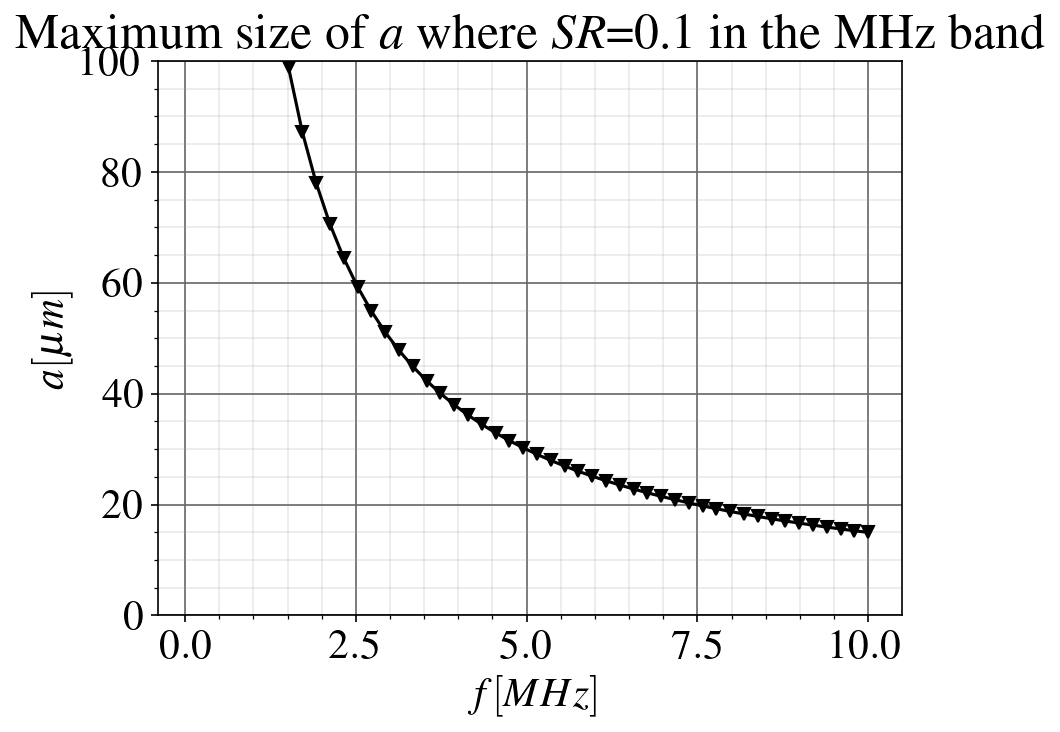

In [569]:
a_max = lambda SR,c0,f: SR*c0/(2*np.pi*f)
a_max = lambda SR,c0,f: SR*c0/f
f_vec = np.linspace(0.1,10,50)*1e6 #Hz
SR=0.1
a_vec_max = a_max(SR,c0,f_vec)
fig, ax = plt.subplots(1,1)
ax.plot(f_vec*1e-6,a_vec_max*1e6,'v-',c='black')
ax.set_xlabel('$f [MHz]$')
ax.set_ylabel('$a [\mu m]$')
ax.set_title(f'Maximum size of $a$ where $SR$={SR} in the MHz band')
ax.set_ylim((0,100))
ax.grid(visible=True, which='major', color='#666666', linestyle='-')
ax.minorticks_on()  
ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/max_a_sr.png'), bbox_inches='tight')

## Eigenmode A

In [4]:
a_values = np.array([10,25,50,100])*1e-6
results = {}
z_h = 4e-3
xy_d = 1e-3
nx,ny,nz = 3,3,1
for a in a_values:
    acoustic = AcousticPT('radii',condition='mixed-wall',a=a, nx=nx, ny=ny, nz=nz, pa=0.2e6, h=z_h, f=1.49*1e6, material='latex',medium='water')
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)

In [14]:
results[10].param

{'a': 9.999999999999999e-06,
 'f': 1490000.0,
 'h': 0.004,
 'pa': 200000.0,
 'nx': 3,
 'ny': 3,
 'nz': 1,
 'medium': 'water',
 'material': 'latex',
 'n_points': 250,
 'l': 0.0021482952364160718,
 'k_p': 3.5071598668682114e-10,
 'c_p': 1610,
 'rho_p': 1100,
 'k_0': 4.471218134402995e-10,
 'rho_0': 998,
 'c_0': 1497,
 'E_ac': 4.471218134402995,
 'power': 0.07908161950078142,
 'A_trans': 2.953710350597111e-06,
 'Vin': 0.13386827094402565,
 'PHI': 0.10376634525268263,
 'f1': 0.21561423275617175,
 'f2': 0.06378986866791744}

In [15]:
for a,obj in results.items():
    K_vec,K_vec_norm = obj.stiffness()
    K_vec = K_vec*1e6
    K_vec_norm = K_vec_norm*1e3
    print(f'Given a={a} [um]: \t kx={K_vec[0]}, ky={K_vec[1]}, kz={K_vec[2]} [pN/um]')
    print(f'Given a={a} [um]: \t kx={K_vec_norm[0]}, ky={K_vec_norm[1]}, kz={K_vec_norm[2]} [pN/um mW]')
    print('\n')

Given a=10 [um]: 	 kx=0.22442775357470346, ky=0.22442775357470346, kz=0.0071928665222966495 [pN/um]
Given a=10 [um]: 	 kx=2718.959772222764, ky=2718.959772222764, kz=87.14213999643596 [pN/um mW]


Given a=25 [um]: 	 kx=3.506683649604742, ky=3.506683649604742, kz=0.11238853941088515 [pN/um]
Given a=25 [um]: 	 kx=42483.746440980685, ky=42483.746440980685, kz=1361.595937444312 [pN/um mW]


Given a=50 [um]: 	 kx=28.053469196837938, ky=28.053469196837938, kz=0.8991083152870812 [pN/um]
Given a=50 [um]: 	 kx=339869.9715278455, ky=339869.9715278455, kz=10892.767499554497 [pN/um mW]


Given a=100 [um]: 	 kx=224.4277535747035, ky=224.4277535747035, kz=7.19286652229665 [pN/um]
Given a=100 [um]: 	 kx=2718959.772222764, ky=2718959.772222764, kz=87142.13999643597 [pN/um mW]




In [7]:
results[100].model['results']['total'][2].max()*1e12

499619799.1043826



weight 4.520123509984992e-11
Bouyant 4.100984784513657e-11
W_rel -4.191387254713351e-12
Max Fac  z: 5.940782391253093e-12
Minimum E_ac energy density required: 3.154568786961906e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566084 [MPa]
Minimum Power required 422.29666908458273 [mW]


weight 7.062692984351551e-10
Bouyant 6.407788725802589e-10
W_rel -6.549042585489621e-11
Max Fac  z: 9.282472486332984e-11
Minimum E_ac energy density required: 3.1545687869619015e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566073 [MPa]
Minimum Power required 422.29666908458216 [mW]


weight 5.650154387481241e-09
Bouyant 5.126230980642071e-09
W_rel -5.239234068391697e-10
Max Fac  z: 7.425977989066387e-10
Minimum E_ac energy density required: 3.1545687869619015e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566073 [MPa]
Minimum Power required 422.29666908458216 [mW]


weight 4.5201235099849926e-08
Bouyant 4.100984784513657e-08
W_rel -4.191387254713357e-09
Max Fac  z: 5.94078

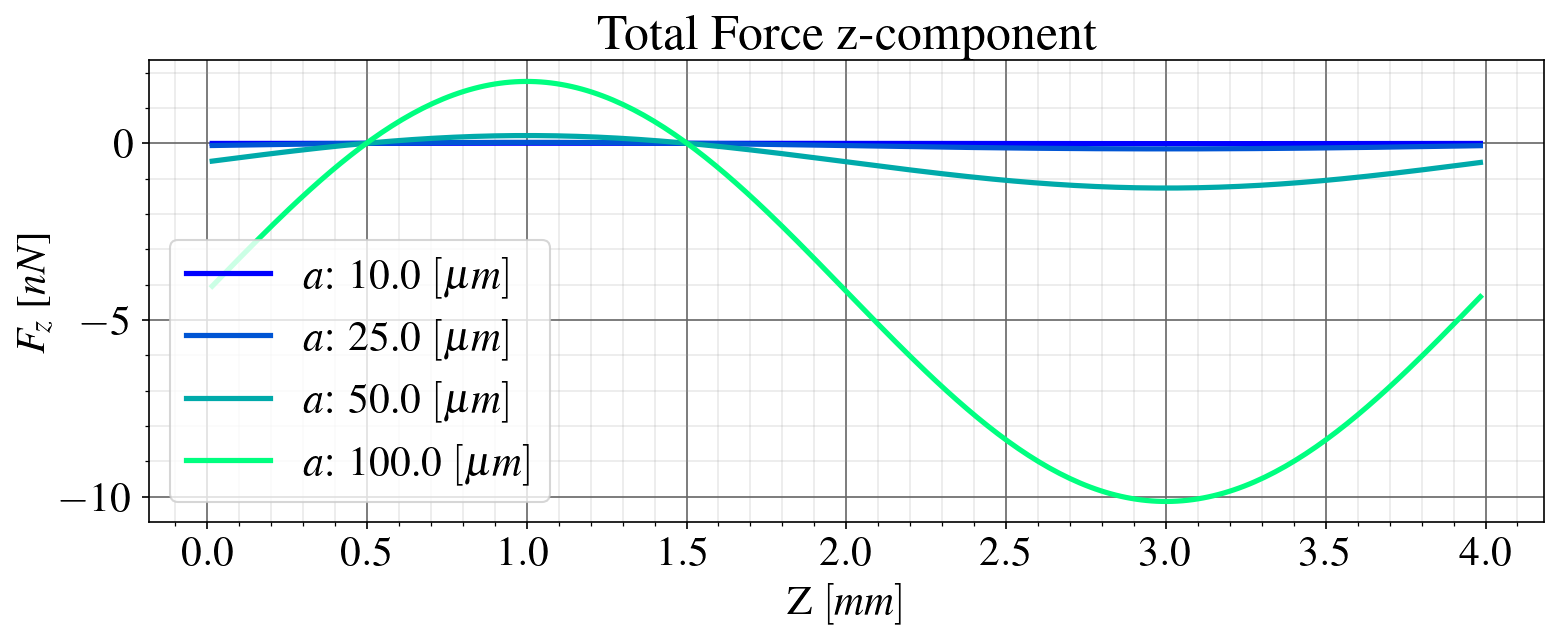

In [13]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (150)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('text', usetex=True)

mpl.rc('font',family='Times New Roman', size=20)
fig,ax = plt.subplots(1,1, figsize=(12,4))
colormap_ = mcp.gen_color(cmap='winter',n=(len(a_values)))
plane_val = 50
i = 0
for a in list(results.keys()):
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    E_ac = r.model['parameters']['E_ac']*1e-6
    W_rel = B-W   #[N]
    x_plane_d = d/(2)
    y_plane_d = d/(2)
    z_plane_d = h/2
    x_plane, y_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    label = r'$a$:' +f' {np.round(a*1e6)} '+'$[\mu m]$'

    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    ax.plot(r.model['positions']['z'][1:-1]*1e3, (W_rel+fz)*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    E_ac = r.model['parameters']['E_ac']
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    F_hat = abs(fz/E_ac).max()   #[Fm^3/J]
    # A = r.param['A_trans']
    E_min = abs(W_rel)/F_hat  #[Emin]
    k0 = r.model['parameters']['k_0']
    P_min = np.sqrt(4*E_min/k0)
    vin =r.param['Vin']
    power_min = E_min*vin
    print('\n')
    print('weight',W)
    print('Bouyant', B)
    print('W_rel', W_rel)
    print('Max Fac  z:', fz.max())
    print('Minimum E_ac energy density required:', E_min*1e-6, '[J/cm^3]',)
    print('Minimum Pa amplitude required',  P_min*1e-6, '[MPa]')
    print('Minimum Power required',  power_min*1e3, '[mW]')
    

    i+=1
i=0    
comp_lab = {0:'x',1:'y',2:'z'}

ax.set_ylabel(f'$F_z$ [$nN$]')
ax.set_xlabel(r'Z $[mm]$')

ax.legend()
ax.set_title(r'Total Force z-component')
ax.grid(visible=True, which='major', color='#666666', linestyle='-')
ax.minorticks_on()  
ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
print('\n')
vin =r.param['Vin']
power = E_ac*vin
print('Current E_ac [J/cm^3]', E_ac*1e-6)
print('Current Pin [MPa]', PA*1e-6)
print('Current Power [mW]', power*1e3)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_totf.png'), bbox_inches='tight')
plt.show()



Minimum E_ac energy density required: 3.154568786961906e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566084 [MPa]
Minimum Power required 422.29666908458273 [mW]


Minimum E_ac energy density required: 3.1545687869619015e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566073 [MPa]
Minimum Power required 422.29666908458216 [mW]


Minimum E_ac energy density required: 3.1545687869619015e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566073 [MPa]
Minimum Power required 422.29666908458216 [mW]


Minimum E_ac energy density required: 3.1545687869619015e-06 [J/cm^3]
Minimum Pa amplitude required 0.16799140702566073 [MPa]
Minimum Power required 422.29666908458216 [mW]


Current E_ac [J/cm^3] 4.471218134402995e-06
Current Pin [MPa] 0.19999999999999998
Current Power [mW] 598.554240666101


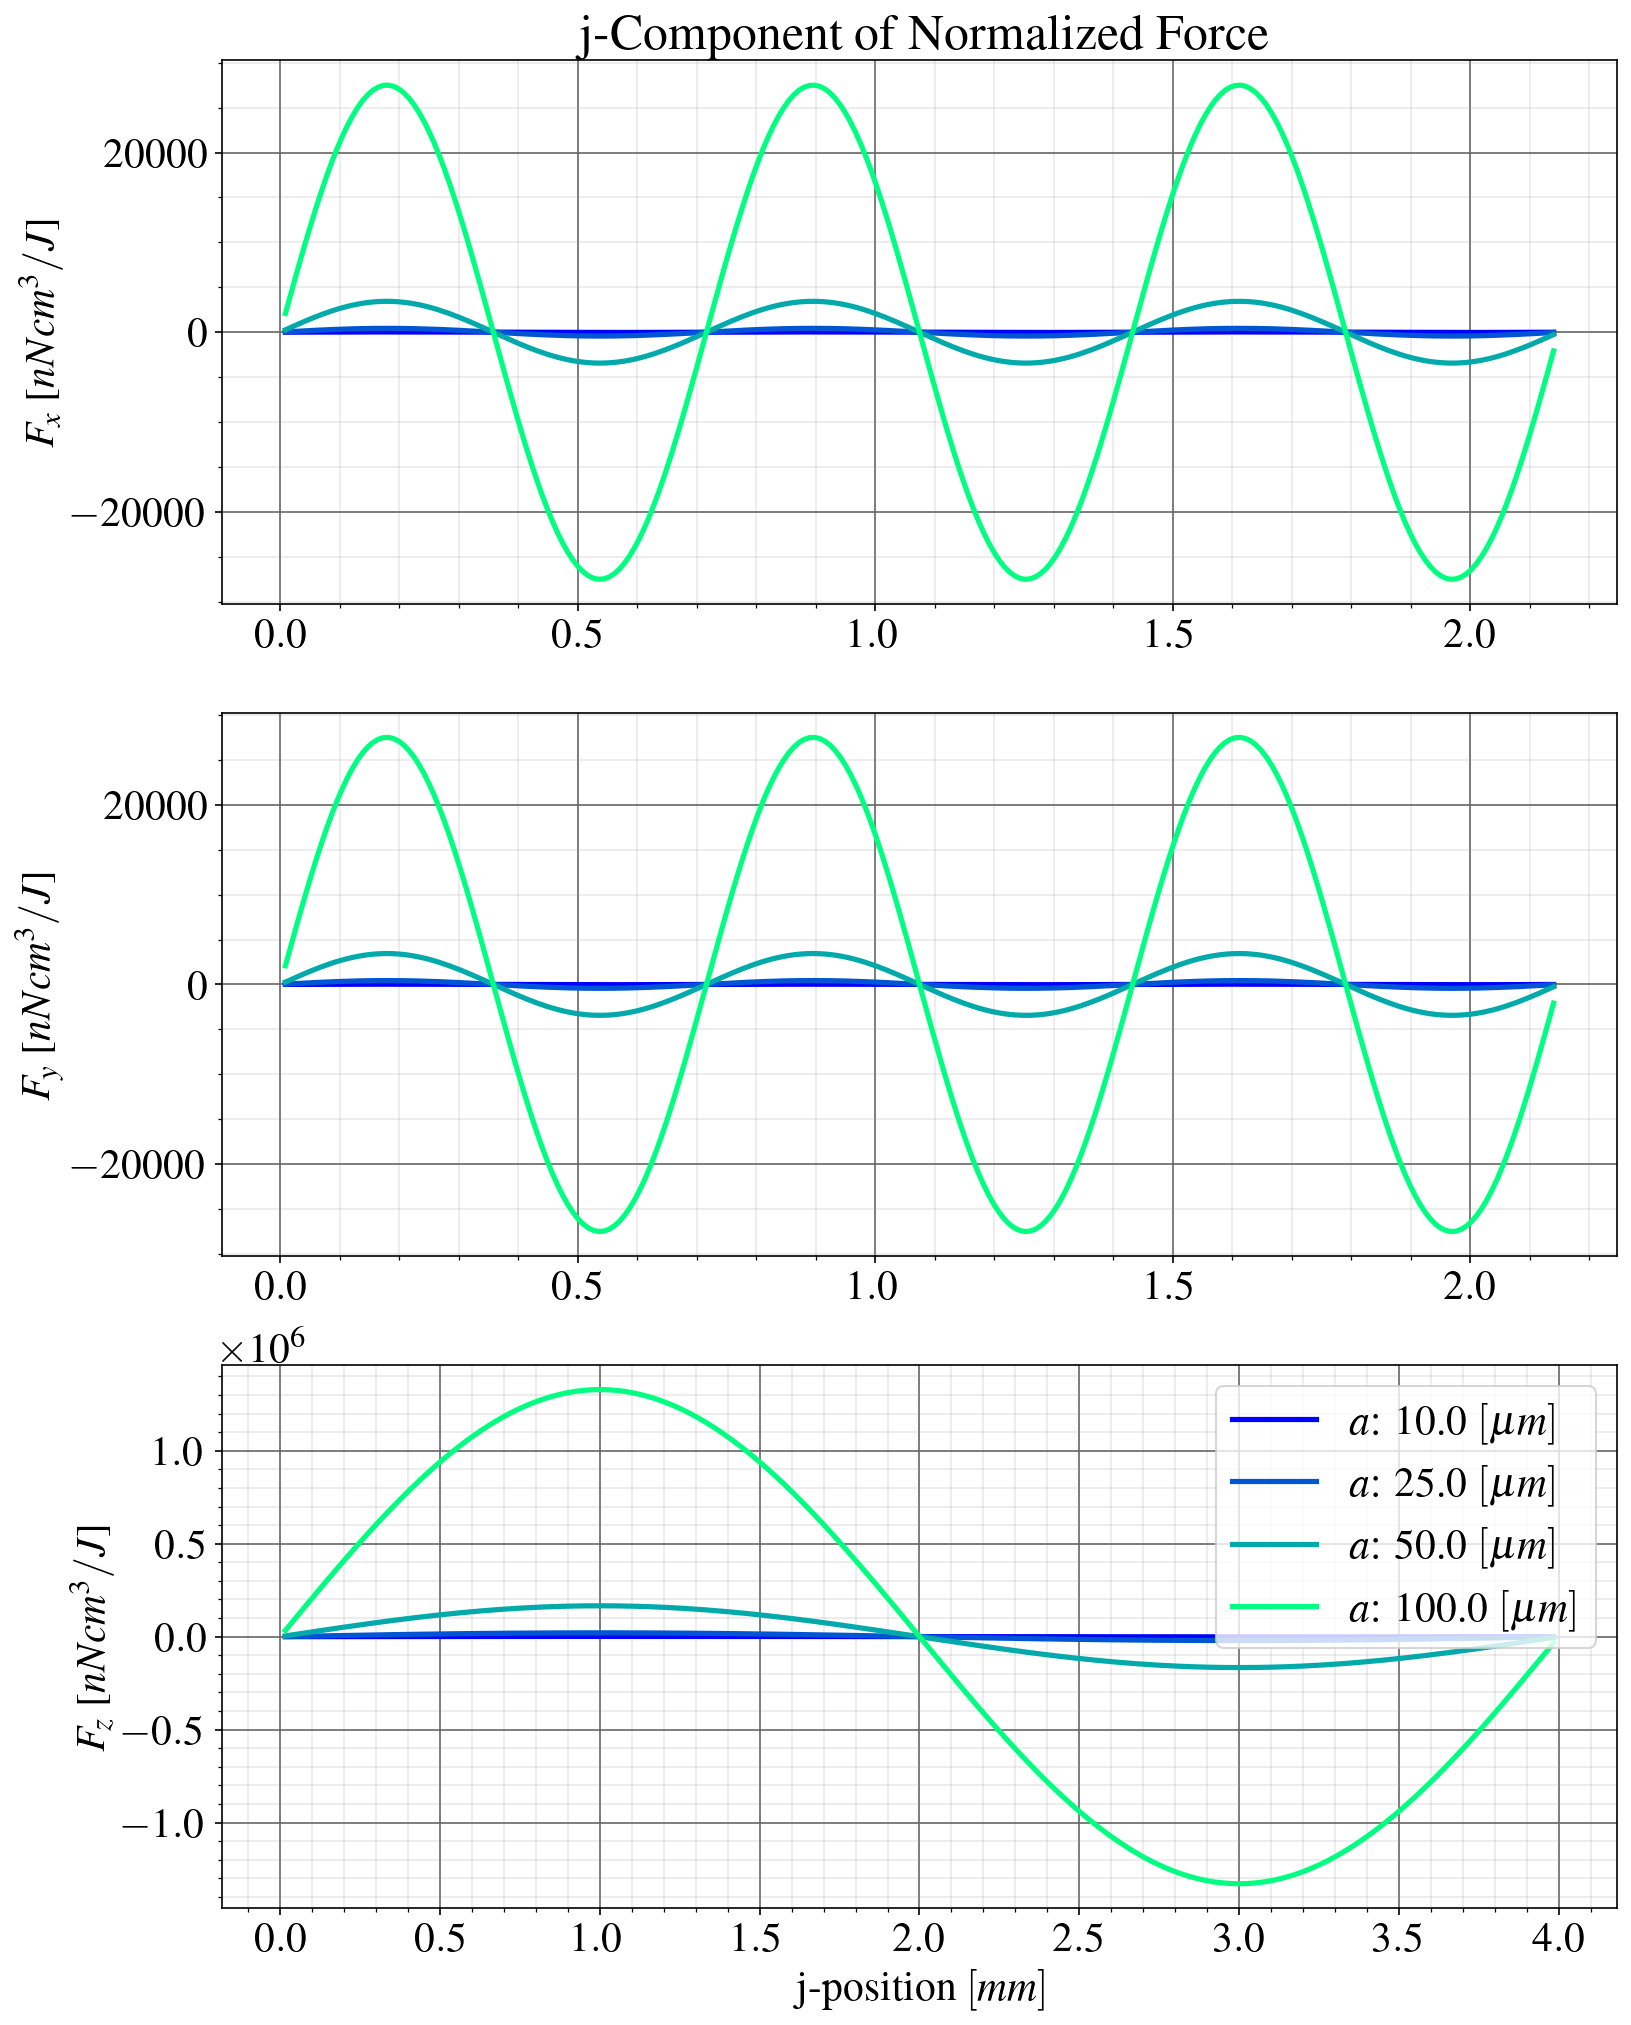

In [14]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (150)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('text', usetex=True)

mpl.rc('font',family='Times New Roman', size=20)
fig,ax = plt.subplots(3,1, figsize=(12,16))
colormap_ = mcp.gen_color(cmap='winter',n=(len(a_values)))
plane_val = 50
i = 0
for a in list(results.keys()):
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    E_ac = r.model['parameters']['E_ac']*1e-6
    W_rel = B-W   #[N]
    x_plane_d = d/(2)
    y_plane_d = d/(2)
    z_plane_d = h/(2)
    x_plane, y_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    
    fx = r.model['results']['total'][0][:,y_plane,z_plane][1:-1]/E_ac
    label = r'$a$:' +f' {np.round(a*1e6)} '+'$[\mu m]$'

    ax[0].plot(r.model['positions']['x'][1:-1]*1e3, fx*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    
    fy = r.model['results']['total'][1][x_plane,:,z_plane][1:-1]/E_ac
    ax[1].plot(r.model['positions']['y'][1:-1]*1e3, fy*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]/E_ac
    ax[2].plot(r.model['positions']['z'][1:-1]*1e3, fz*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    E_ac = r.model['parameters']['E_ac']
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    F_hat = abs(fz/E_ac).max()   #[Fm^3/J]
    # A = r.param['A_trans']
    E_min = abs(W_rel)/F_hat  #[Emin]
    k0 = r.model['parameters']['k_0']
    P_min = np.sqrt(4*E_min/k0)
    vin =r.param['Vin']
    power_min = E_min*vin
    print('\n')
    print('Minimum E_ac energy density required:', E_min*1e-6, '[J/cm^3]',)
    print('Minimum Pa amplitude required',  P_min*1e-6, '[MPa]')
    print('Minimum Power required',  power_min*1e3, '[mW]')
    

    i+=1
i=0    
comp_lab = {0:'x',1:'y',2:'z'}
for i in range(3):
    ax[i].set_ylabel(f'$F_{comp_lab[i]}$ [$nNcm^3/J$]')
    if i ==2:
        ax[i].set_xlabel(r'j-position $[mm]$')
        ax[i].set_ylabel(f'$F_{comp_lab[i]}$ [$nN cm^3/J$]')
        ax[i].legend()
    if i ==0:
        ax[i].set_title(f'j-Component of Normalized Force')
    
    ax[i].grid()
    ax[i].grid(visible=True, which='major', color='#666666', linestyle='-')
    ax[i].minorticks_on()  
    ax[i].grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
print('\n')
vin =r.param['Vin']
power = E_ac*vin
print('Current E_ac [J/cm^3]', E_ac*1e-6)
print('Current Pin [MPa]', PA*1e-6)
print('Current Power [mW]', power*1e3)
# plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_normf.png'), bbox_inches='tight')
plt.show()




(<Figure size 1200x800 with 1 Axes>,
 <Axes3DSubplot:title={'center':'YZ plane slices of Preassure $P_{in}$'}, xlabel='$x$ $[mm]$', ylabel='$y$ $[mm]$'>)

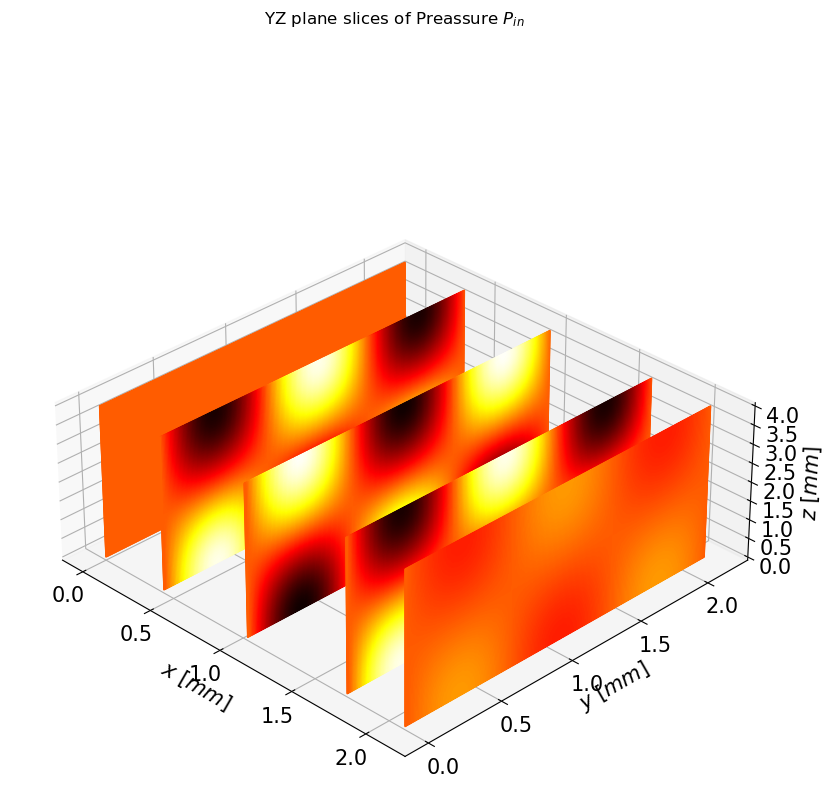

In [6]:
plt.rcParams['figure.dpi'] = (100)
planes = {'x':[0,50,120,200,245],'y':[],'z':[]}
results[100].plot_preassure_slices(planes=planes,s_x=2.0,s_y=2.0,s_z=1.0)
# plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_p1slice.png'), bbox_inches='tight')

(<Figure size 1200x800 with 1 Axes>,
 <Axes3DSubplot:title={'center':"YZ plane slices of Gor'kov potential $U$"}, xlabel='$x$ $[mm]$', ylabel='$y$ $[mm]$'>)

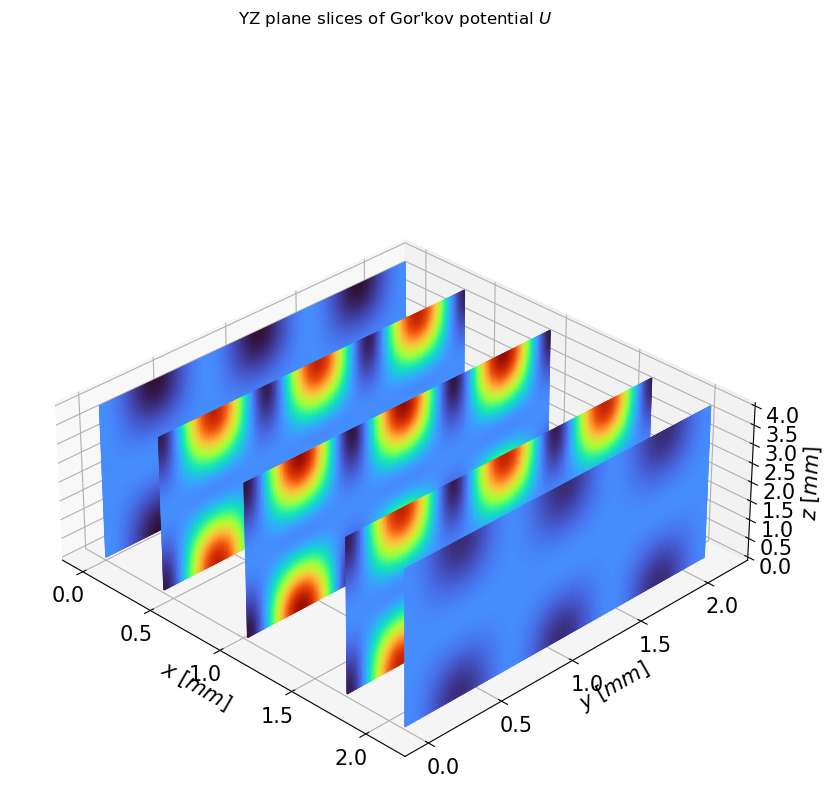

In [10]:
%matplotlib inline
plt.rcParams['figure.dpi'] = (100)
planes = {'x':[0,50,120,200,245],'y':[],'z':[]}
results[100].plot_gorkov_slices(planes=planes,s_x=2.0,s_y=2.0,s_z=1.0,cmap_=plt.cm.turbo)
# plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_gorkov.png'), bbox_inches='tight')

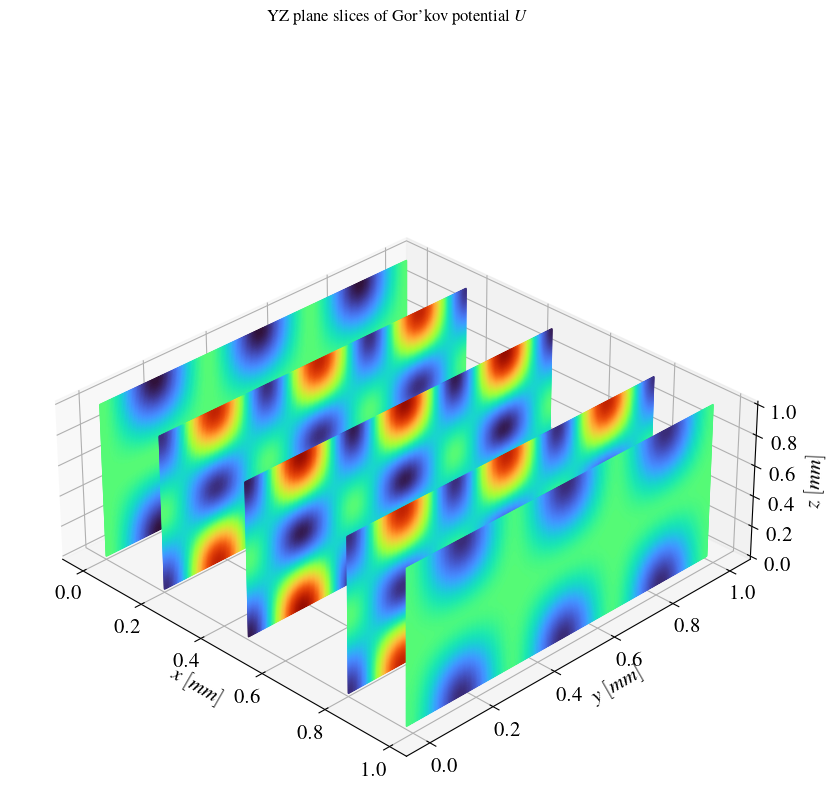

In [ ]:
%matplotlib inline
plt.rcParams['figure.dpi'] = (100)
planes = {'x':[0,50,120,200,245],'y':[],'z':[]}
results[100].plot_gorkov_slices(planes=planes,s_x=2.0,s_y=2.0,s_z=1.0,cmap_=plt.cm.turbo)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_gorkov.png'), bbox_inches='tight')

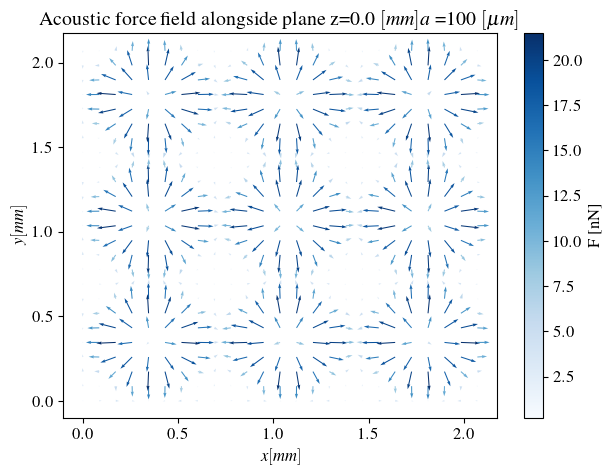

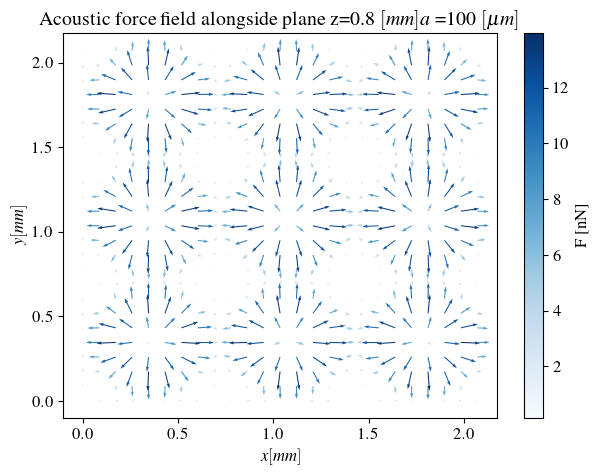

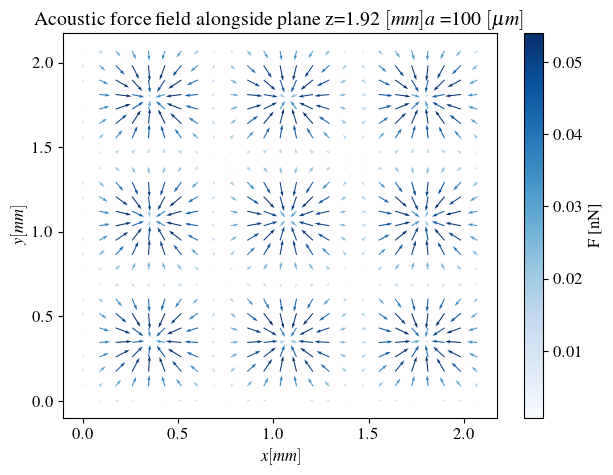

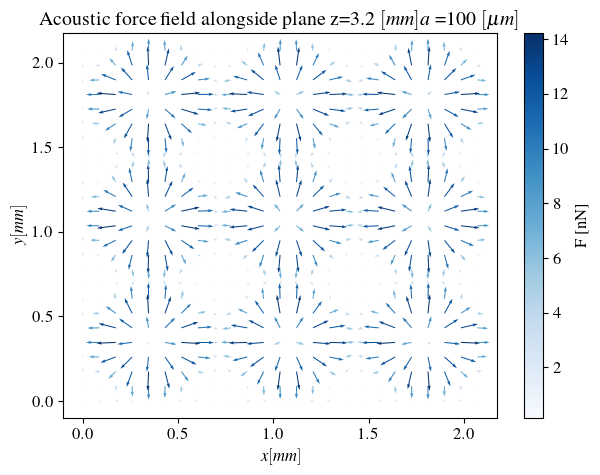

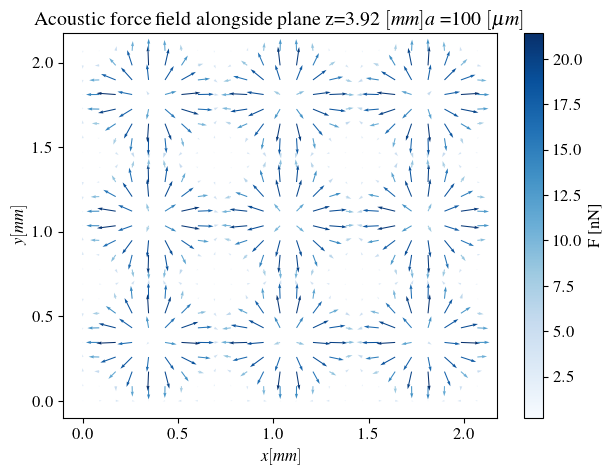

In [11]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (100)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['image.cmap'] = 'Blues'
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
mpl.rc('font',family='Times New Roman', size=12)
mpl.rc('text', usetex=True)

planes = np.array([0,50,120,200,245])
# planes = np.linspace(0,z_h*0.99,5)
i=1
for plane in planes:
    a_ =  100
    n_points = results[a_].model['parameters']['n_points']
    l = results[a_].model['parameters']['h']
    # plane=int(x_val*n_points/l)
    x_val = plane*l/250
    s = 10
    # a_ = list(results_2.keys())[-1]
    x,y = np.meshgrid(results[a_].model['positions']['x'][::s]*1e3, results[a_].model['positions']['y'][::s]*1e3, indexing='ij')
    u = results[a_].model['results']['total'][0][:,:,plane][::s,::s]*1e9
    v = results[a_].model['results']['total'][1][:,:,plane][::s,::s]*1e9
    mag = np.hypot(u,v)

    plt.quiver(x,y,u,v, mag)
    plt.xlabel(r'$x [mm]$')
    plt.ylabel(r'$y [mm]$')
    x_val = np.round((plane*l/n_points)*1e3,2)
    plt.title(f'Acoustic force field alongside plane z={x_val} '+r'$[mm] a$ '+f'={a_}'+r' $[\mu m]$')
    cbar = plt.colorbar()
    cbar.set_label(r' F  [nN]',rotation=90)
    
    # plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_zquiv_{i}.png'), bbox_inches='tight')
    plt.show()
    i+=1

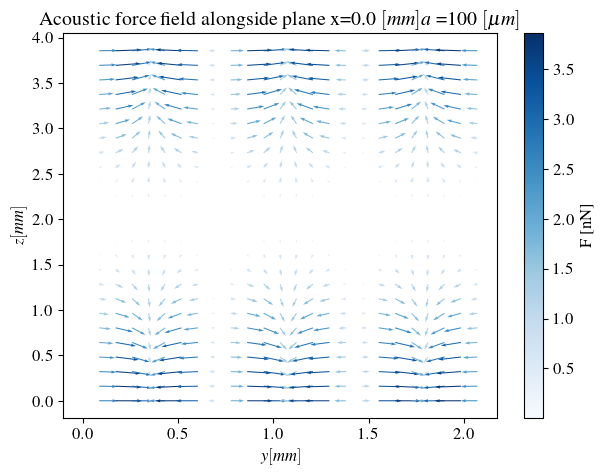

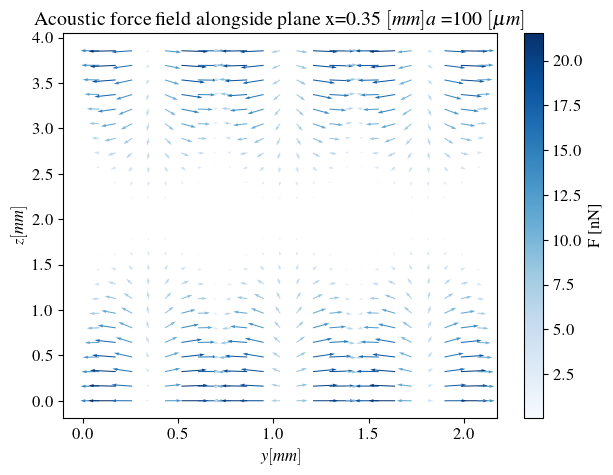

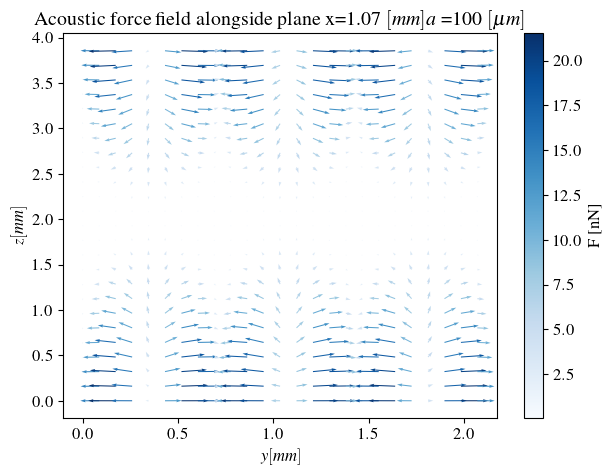

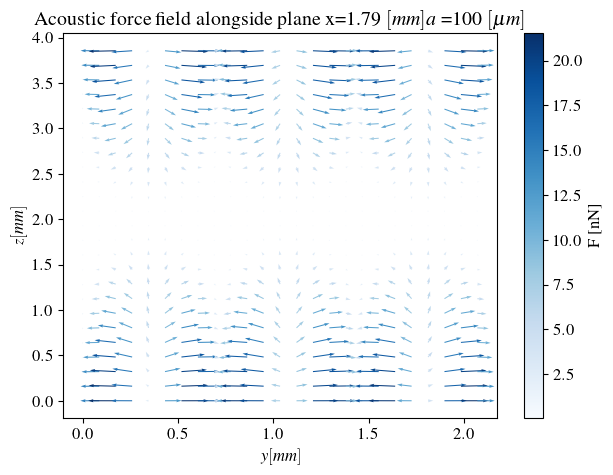

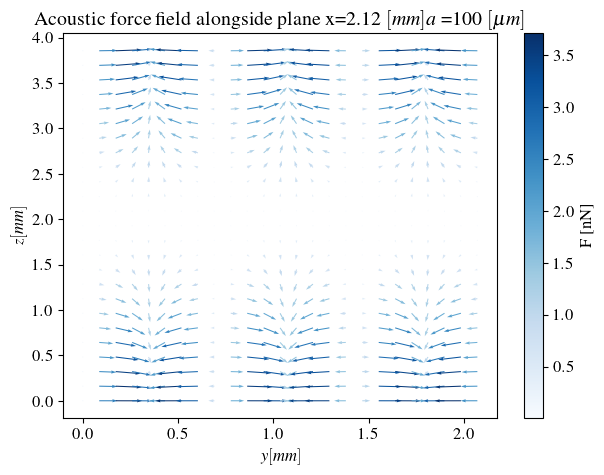

In [15]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (100)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['image.cmap'] = 'Blues'
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
mpl.rc('font',family='Times New Roman', size=12)
mpl.rc('text', usetex=True)

planes = np.array([0,d/6,d/2,d-d/6,d*0.99])
# planes = np.array([0,50,120,200,245])
i=1
for x_val in planes:
    a_ =  100
    n_points = results[a_].model['parameters']['n_points']
    l = results[a_].model['parameters']['l']
    plane=int(x_val*n_points/l)
    # x_val = plane*l/250
    s = 10
    # a_ = list(results_2.keys())[-1]
    y,z = np.meshgrid(results[a_].model['positions']['y'][::s]*1e3, results[a_].model['positions']['z'][::s]*1e3,indexing='ij')
    u = results[a_].model['results']['total'][1][plane,:,:][::s,::s]*1e9
    v = results[a_].model['results']['total'][2][plane,:,:][::s,::s]*1e9
    mag = np.hypot(u,v)

    plt.quiver(y,z,u,v, mag)
    plt.xlabel(r'$y [mm]$')
    plt.ylabel(r'$z [mm]$')
    x_val = np.round((plane*l/n_points)*1e3,2)
    plt.title(f'Acoustic force field alongside plane x={x_val} '+r'$[mm] a$ '+f'={a_}'+r' $[\mu m]$')
    cbar = plt.colorbar()
    cbar.set_label(r' F  [nN]',rotation=90)
    
    # plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_xquiv_{i}.png'), bbox_inches='tight')
    plt.show()
    i+=1

    

In [ ]:
results[a_].param

{'a': 9.999999999999999e-05,
 'f': 1296440.0294653047,
 'h': 0.001,
 'pa': 200000000.0,
 'nx': 1,
 'ny': 1,
 'nz': 1,
 'medium': 'water',
 'material': 'silicon',
 'n_points': 250,
 'l': 0.001,
 'k_p': 5.951718005391627e-12,
 'k_0': 4.471218134402995e-10,
 'power': 17135.138680835284,
 'A_trans': 6.4e-07,
 'Vin': 133.86827094402565}

## Eigenmode B

In [21]:
a_values = np.array([10,25,50,100])*1e-6
results = {}
z_h = 1e-3
xy_d = 1e-3
nx,ny,nz = 1,1,1
for a in a_values:
    acoustic = AcousticPT('radii',condition='soft-wall',a=a, nx=nx, ny=ny, nz=nz, pa=0.15e6, h=z_h, f=1.49*1e6, material='silica',medium='water')
    r_i = [0,0,0]
    r_f = [acoustic.param['l'],acoustic.param['l'],z_h]
    results[int(np.round(a*1e6,1))] = acoustic
    results[int(np.round(a*1e6,1))].acoustic_force(r_i,r_f)

In [22]:
results[10].param

{'a': 9.999999999999999e-06,
 'f': 1490000.0,
 'h': 0.001,
 'pa': 150000.0,
 'nx': 1,
 'ny': 1,
 'nz': 1,
 'medium': 'water',
 'material': 'silica',
 'n_points': 250,
 'l': 0.0008216231652382851,
 'k_p': 2e-11,
 'c_p': 5000,
 'rho_p': 2000,
 'k_0': 4.471218134402995e-10,
 'rho_0': 998,
 'c_0': 1497,
 'E_ac': 2.5150602006016847,
 'power': 0.006506620863268936,
 'A_trans': 4.3204136041995423e-07,
 'Vin': 0.10040120320801925,
 'PHI': 0.518903345530164,
 'f1': 0.95526946036,
 'f2': 0.4009603841536614}

In [23]:
for a,obj in results.items():
    K_vec,K_vec_norm = obj.stiffness()
    K_vec = K_vec*1e6
    print(f'Given a={a} [um]: \t kx={K_vec[0]}, ky={K_vec[1]}, kz={K_vec[2]} [pN/um]')
    print(f'Given a={a} [um]: \t kx={K_vec_norm[0]}, ky={K_vec_norm[1]}, kz={K_vec_norm[2]} [pN/um W]')
    print('\n')

Given a=10 [um]: 	 kx=0.4795447156956017, ky=0.4795447156956017, kz=0.32372367398644986 [pN/um]
Given a=10 [um]: 	 kx=282.44596442204113, ky=282.44596442204113, kz=190.66927924066346 [pN/um W]


Given a=25 [um]: 	 kx=7.492886182743778, ky=7.492886182743778, kz=5.058182406038279 [pN/um]
Given a=25 [um]: 	 kx=4413.218194094394, ky=4413.218194094394, kz=2979.207488135367 [pN/um W]


Given a=50 [um]: 	 kx=59.94308946195022, ky=59.94308946195022, kz=40.46545924830623 [pN/um]
Given a=50 [um]: 	 kx=35305.74555275515, ky=35305.74555275515, kz=23833.659905082935 [pN/um W]


Given a=100 [um]: 	 kx=479.5447156956018, ky=479.5447156956018, kz=323.72367398644985 [pN/um]
Given a=100 [um]: 	 kx=282445.9644220412, ky=282445.9644220412, kz=190669.27924066348 [pN/um W]




In [24]:
results[100].model['results']['total'][2].max()*1e12

44584.45101526609



Minimum E_ac energy density required: 2.3226849165113527e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829884 [MPa]
Minimum Power required 233.20036029085756 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Current E_ac [J/cm^3] 2.5150602006016847e-06
Current Pin [MPa] 0.15
Current Power [mW] 252.5150702810114


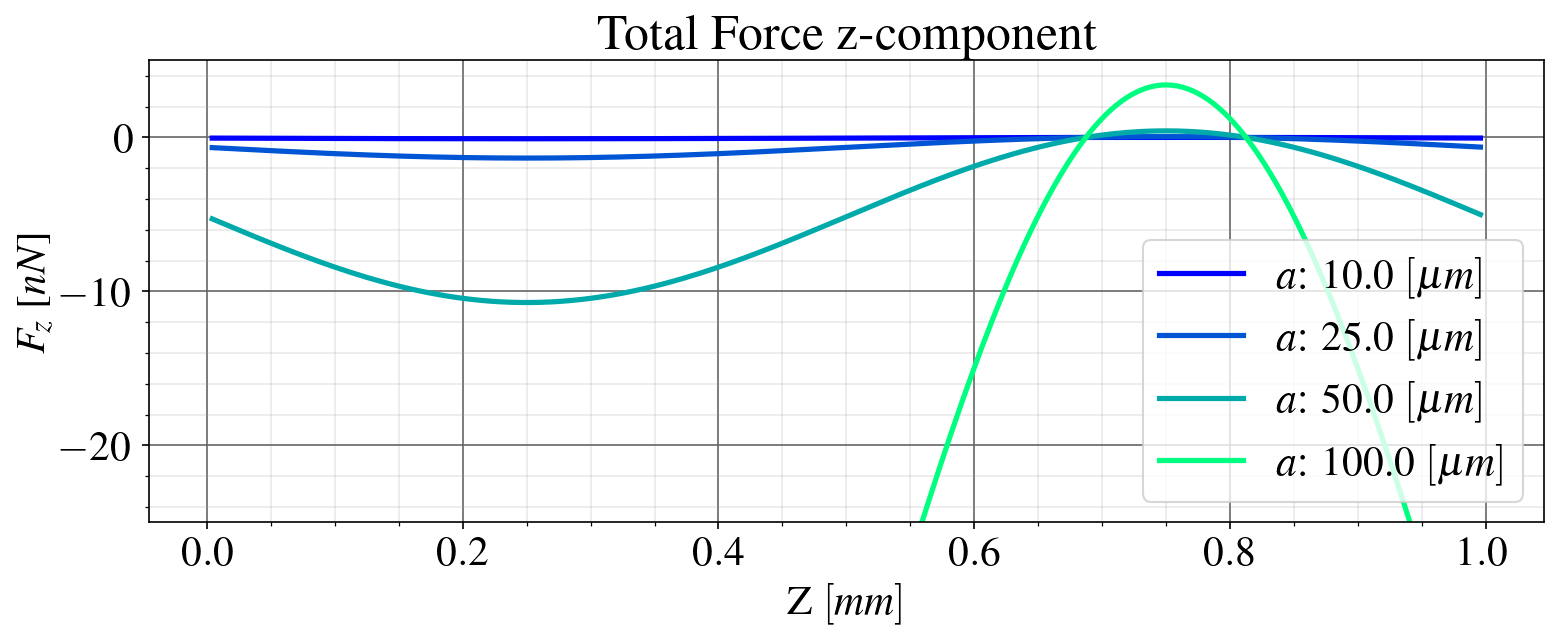

In [35]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (150)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('text', usetex=True)

mpl.rc('font',family='Times New Roman', size=20)
fig,ax = plt.subplots(1,1, figsize=(12,4))
colormap_ = mcp.gen_color(cmap='winter',n=(len(a_values)))
plane_val = 50
i = 0
for a in list(results.keys()):
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    E_ac = r.model['parameters']['E_ac']*1e-6
    W_rel = B-W   #[N]
    x_plane_d = d/(2)
    y_plane_d = d/(2)
    z_plane_d = 0
    x_plane, y_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    label = r'$a$:' +f' {np.round(a*1e6)} '+'$[\mu m]$'

    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    ax.plot(r.model['positions']['z'][1:-1]*1e3, (W_rel+fz)*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    E_ac = r.model['parameters']['E_ac']
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    F_hat = abs(fz/E_ac).max()   #[Fm^3/J]
    # A = r.param['A_trans']
    E_min = abs(W_rel)/F_hat  #[Emin]
    k0 = r.model['parameters']['k_0']
    P_min = np.sqrt(4*E_min/k0)
    vin =r.param['Vin']
    power_min = E_min*vin
    print('\n')
    print('Minimum E_ac energy density required:', E_min*1e-6, '[J/cm^3]',)
    print('Minimum Pa amplitude required',  P_min*1e-6, '[MPa]')
    print('Minimum Power required',  power_min*1e3, '[mW]')
    

    i+=1
i=0    
comp_lab = {0:'x',1:'y',2:'z'}

ax.set_ylabel(f'$F_z$ [$nN$]')
ax.set_xlabel(r'Z $[mm]$')
ax.set_ylim((-25,5))
ax.legend()
ax.set_title(r'Total Force z-component')
ax.grid(visible=True, which='major', color='#666666', linestyle='-')
ax.minorticks_on()  
ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
print('\n')
vin =r.param['Vin']
power = E_ac*vin
print('Current E_ac [J/cm^3]', E_ac*1e-6)
print('Current Pin [MPa]', PA*1e-6)
print('Current Power [mW]', power*1e3)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_totf.png'), bbox_inches='tight')
plt.show()




Minimum E_ac energy density required: 2.3226849165113527e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829884 [MPa]
Minimum Power required 233.20036029085756 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Minimum E_ac energy density required: 2.3226849165113573e-06 [J/cm^3]
Minimum Pa amplitude required 0.14414919335829898 [MPa]
Minimum Power required 233.200360290858 [mW]


Current E_ac [J/cm^3] 2.5150602006016847e-06
Current Pin [MPa] 0.15
Current Power [mW] 252.5150702810114


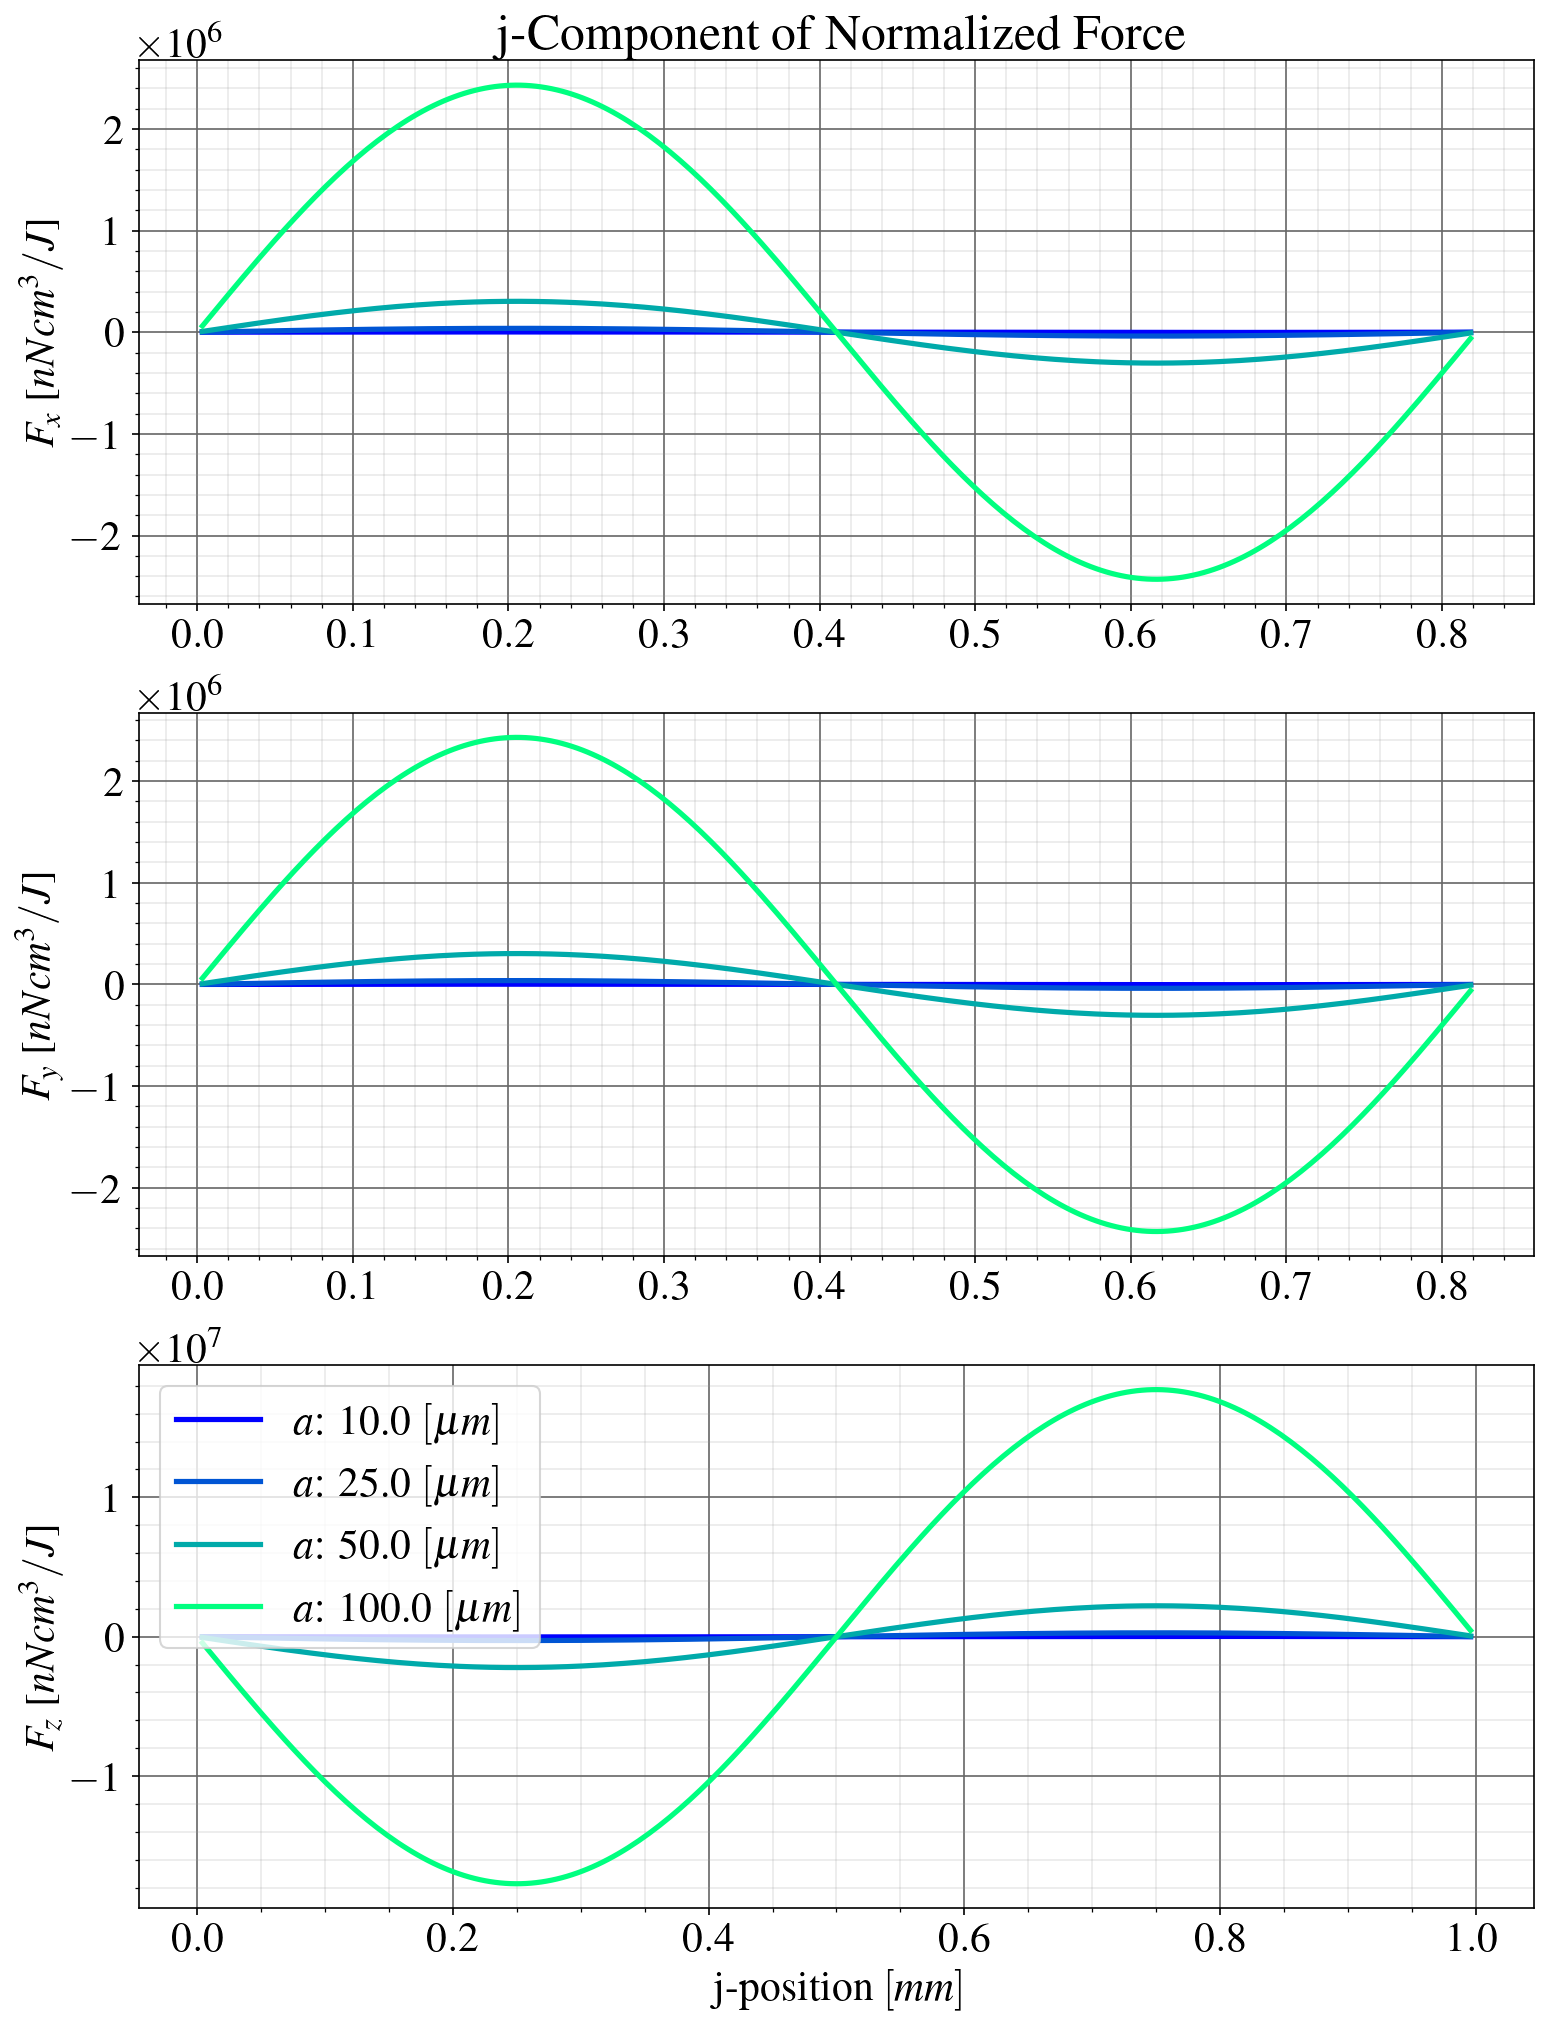

In [34]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (150)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)
mpl.rc('text', usetex=True)

mpl.rc('font',family='Times New Roman', size=20)
fig,ax = plt.subplots(3,1, figsize=(12,16))
colormap_ = mcp.gen_color(cmap='winter',n=(len(a_values)))
plane_val = 50
i = 0
for a in list(results.keys()):
    r = results[a]
    a = a*1e-6
    d = r.model['parameters']['l']
    h = r.model['parameters']['h']
    A = r.model['parameters']['A_trans']
    vin = r.model['parameters']['Vin']
    power = r.model['parameters']['power'] #W/m2
    med = r.model['parameters']['medium']
    PA = r.model['parameters']['pa']
    rho = r.mediums_density[med]
    B = ((4/3)*np.pi*(a**3)*9.81*rho)
    mat = r.model['parameters']['material']
    rho = r.materials_density[mat]
    W = ((4/3)*np.pi*(a**3)*9.81*rho)
    E_ac = r.model['parameters']['E_ac']*1e-6
    W_rel = B-W   #[N]
    x_plane_d = d/(2)
    y_plane_d = d/(2)
    z_plane_d = 0
    x_plane, y_plane, z_plane = int(x_plane_d*250/d), int(y_plane_d*250/d), int(z_plane_d*250/h)
    
    fx = r.model['results']['total'][0][:,y_plane,z_plane][1:-1]/E_ac
    label = r'$a$:' +f' {np.round(a*1e6)} '+'$[\mu m]$'

    ax[0].plot(r.model['positions']['x'][1:-1]*1e3, fx*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    
    fy = r.model['results']['total'][1][x_plane,:,z_plane][1:-1]/E_ac
    ax[1].plot(r.model['positions']['y'][1:-1]*1e3, fy*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]/E_ac
    ax[2].plot(r.model['positions']['z'][1:-1]*1e3, fz*1e9,
              label=label,c=colormap_[i], linewidth=2.5)
    E_ac = r.model['parameters']['E_ac']
    fz = r.model['results']['total'][2][x_plane,y_plane,:][1:-1]
    F_hat = abs(fz/E_ac).max()   #[Fm^3/J]
    # A = r.param['A_trans']
    E_min = abs(W_rel)/F_hat  #[Emin]
    k0 = r.model['parameters']['k_0']
    P_min = np.sqrt(4*E_min/k0)
    vin =r.param['Vin']
    power_min = E_min*vin
    print('\n')
    print('Minimum E_ac energy density required:', E_min*1e-6, '[J/cm^3]',)
    print('Minimum Pa amplitude required',  P_min*1e-6, '[MPa]')
    print('Minimum Power required',  power_min*1e3, '[mW]')
    

    i+=1
i=0    
comp_lab = {0:'x',1:'y',2:'z'}
for i in range(3):
    ax[i].set_ylabel(f'$F_{comp_lab[i]}$ [$nNcm^3/J$]')
    if i ==2:
        ax[i].set_xlabel(r'j-position $[mm]$')
        ax[i].set_ylabel(f'$F_{comp_lab[i]}$ [$nN cm^3/J$]')
        ax[i].legend()
    if i ==0:
        ax[i].set_title(f'j-Component of Normalized Force')
    
    ax[i].grid()
    ax[i].grid(visible=True, which='major', color='#666666', linestyle='-')
    ax[i].minorticks_on()  
    ax[i].grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)
print('\n')
vin =r.param['Vin']
power = E_ac*vin
print('Current E_ac [J/cm^3]', E_ac*1e-6)
print('Current Pin [MPa]', PA*1e-6)
print('Current Power [mW]', power*1e3)
plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_normf.png'), bbox_inches='tight')
plt.show()




(<Figure size 1200x800 with 1 Axes>,
 <Axes3DSubplot:title={'center':'YZ plane slices of Preassure $P_{in}$'}, xlabel='$x$ $[mm]$', ylabel='$y$ $[mm]$'>)

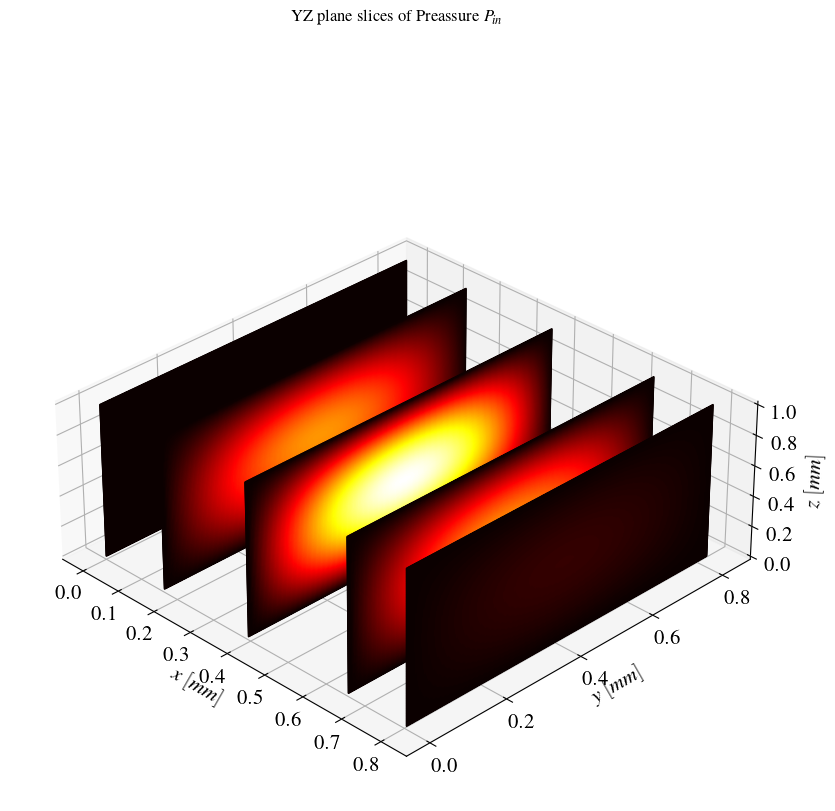

In [28]:
plt.rcParams['figure.dpi'] = (100)
planes = {'x':[0,50,120,200,245],'y':[],'z':[]}
results[100].plot_preassure_slices(planes=planes,s_x=2.0,s_y=2.0,s_z=1.0)
# plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_p1slice.png'), bbox_inches='tight')

(<Figure size 1200x800 with 1 Axes>,
 <Axes3DSubplot:title={'center':"YZ plane slices of Gor'kov potential $U$"}, xlabel='$x$ $[mm]$', ylabel='$y$ $[mm]$'>)

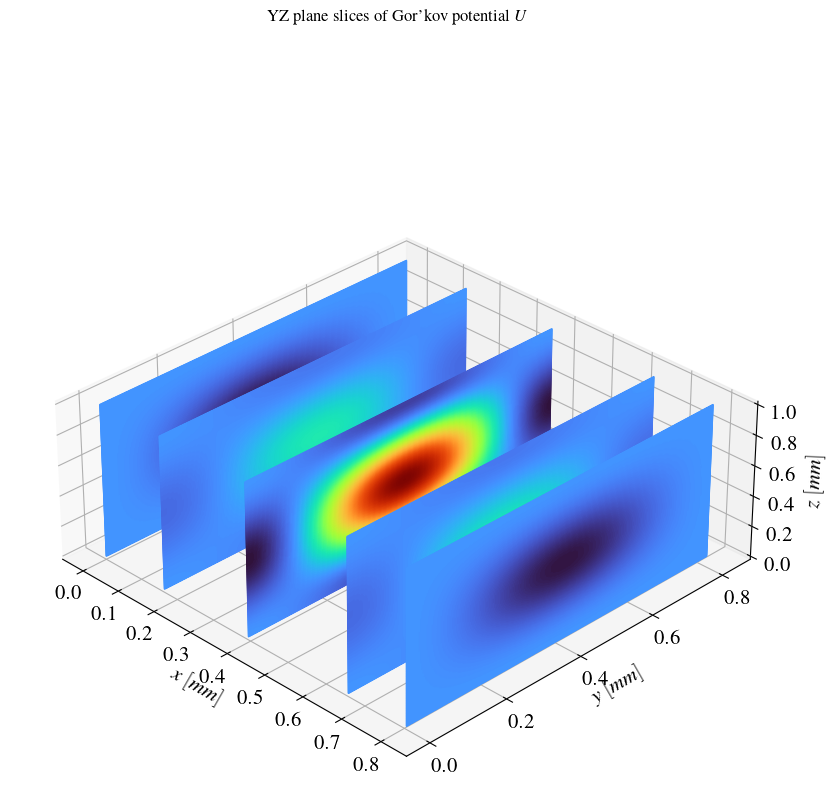

In [27]:
%matplotlib inline
plt.rcParams['figure.dpi'] = (100)
planes = {'x':[0,50,120,200,245],'y':[],'z':[]}
results[100].plot_gorkov_slices(planes=planes,s_x=2.0,s_y=2.0,s_z=1.0,cmap_=plt.cm.turbo)
# plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_gorkov.png'), bbox_inches='tight')

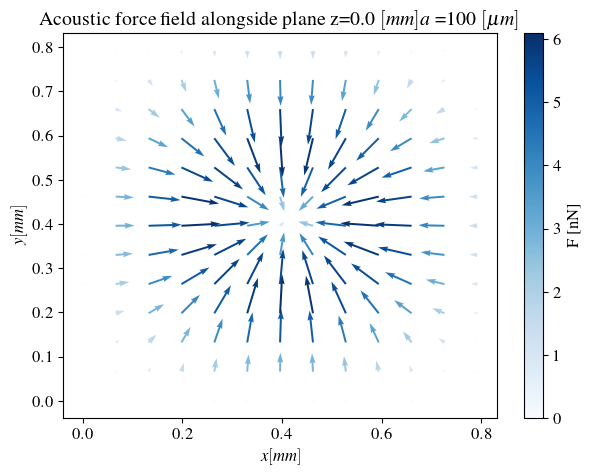

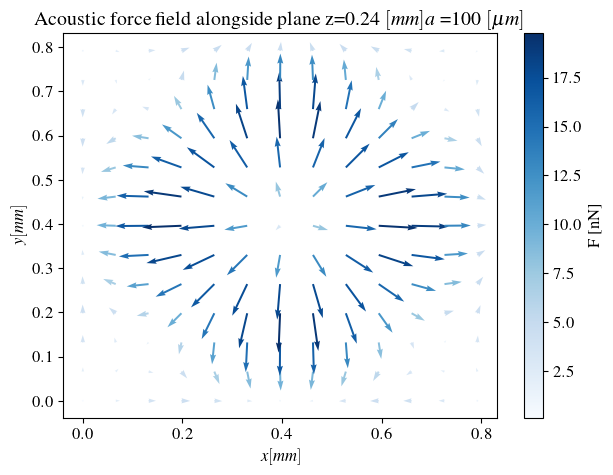

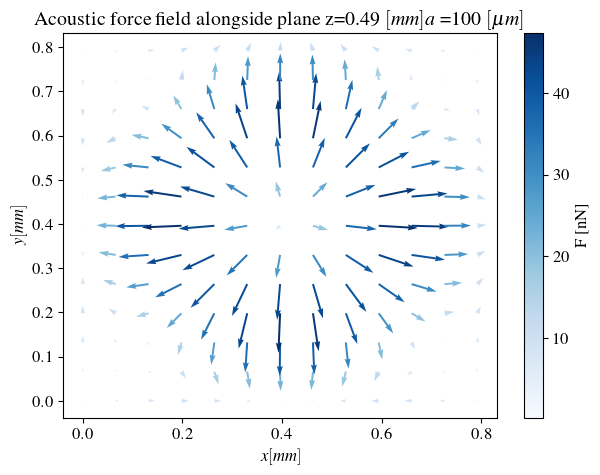

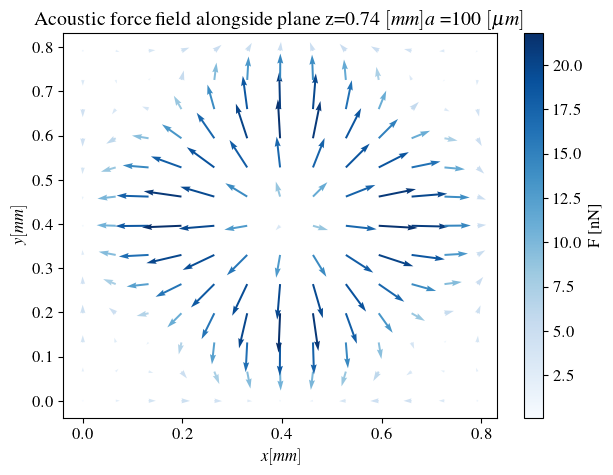

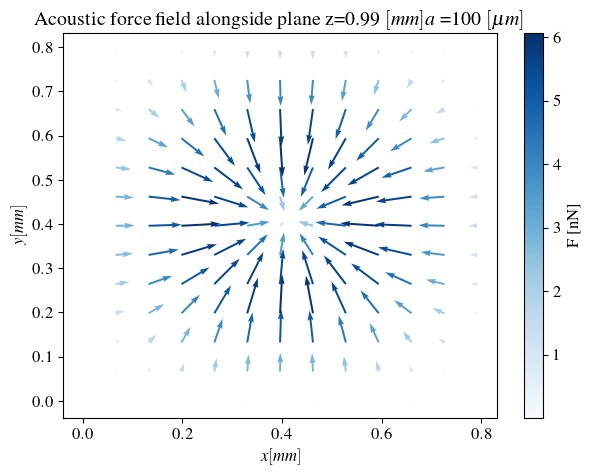

In [31]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (100)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['image.cmap'] = 'Blues'
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
mpl.rc('font',family='Times New Roman', size=12)
mpl.rc('text', usetex=True)

# planes = np.array([0.3,0.52,1.1,1.4,1.52,1.7])*1e-3
planes = np.linspace(0,z_h*0.99,5)
i=1
for x_val in planes:
    a_ =  100
    n_points = results[a_].model['parameters']['n_points']
    l = results[a_].model['parameters']['h']
    plane=int(x_val*n_points/l)
    s = 20
    # a_ = list(results_2.keys())[-1]
    x,y = np.meshgrid(results[a_].model['positions']['x'][::s]*1e3, results[a_].model['positions']['y'][::s]*1e3, indexing='ij')
    u = results[a_].model['results']['total'][0][:,:,plane][::s,::s]*1e9
    v = results[a_].model['results']['total'][1][:,:,plane][::s,::s]*1e9
    mag = np.hypot(u,v)

    plt.quiver(x,y,u,v, mag)
    plt.xlabel(r'$x [mm]$')
    plt.ylabel(r'$y [mm]$')
    x_val = np.round((plane*l/n_points)*1e3,2)
    plt.title(f'Acoustic force field alongside plane z={x_val} '+r'$[mm] a$ '+f'={a_}'+r' $[\mu m]$')
    cbar = plt.colorbar()
    cbar.set_label(r' F  [nN]',rotation=90)
    
    plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_zquiv_{i}.png'), bbox_inches='tight')
    plt.show()
    i+=1

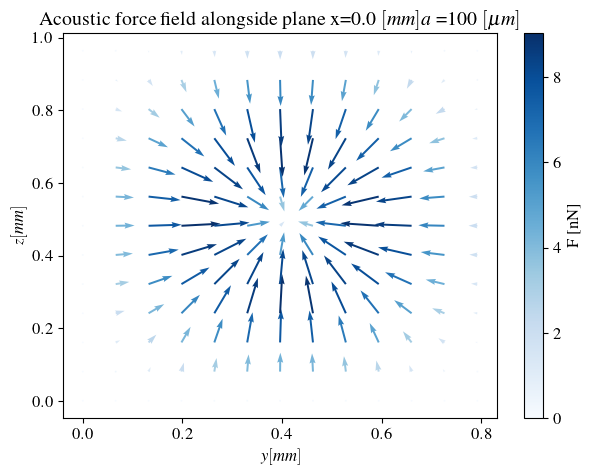

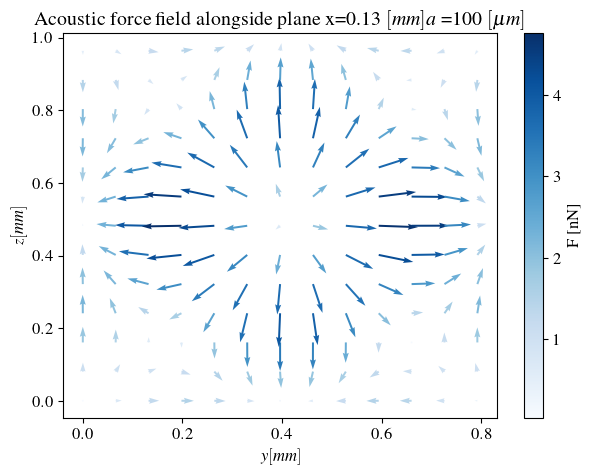

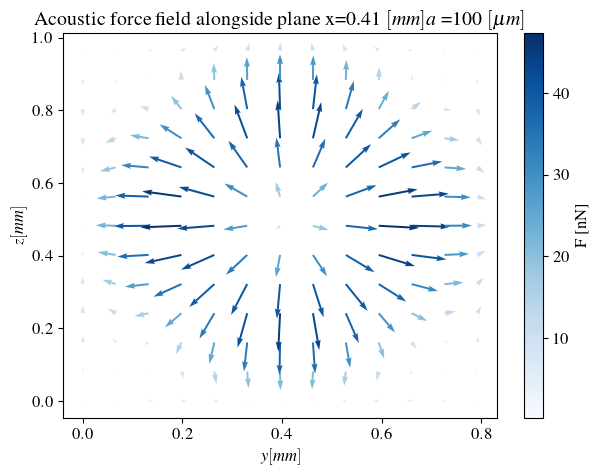

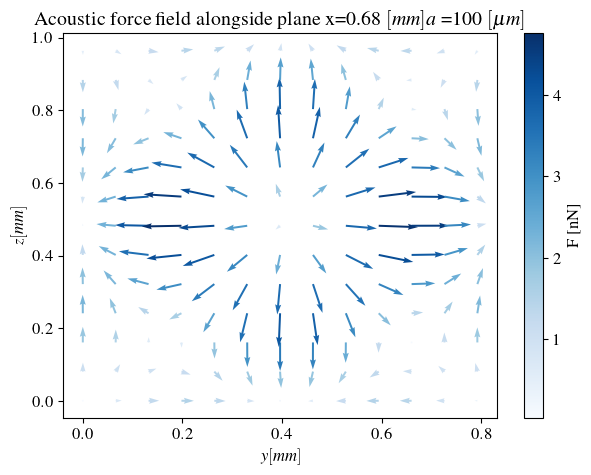

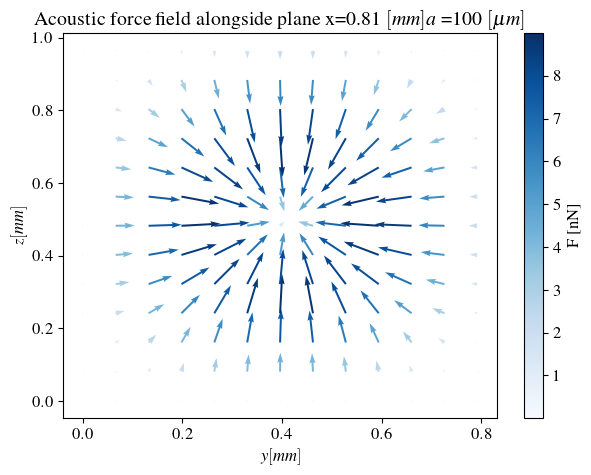

In [32]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.dpi'] = (100)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['image.cmap'] = 'Blues'
mpl.rc('font',**{'family':'Times New Roman','serif':['Times']})
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12)
mpl.rc('font',family='Times New Roman', size=12)
mpl.rc('text', usetex=True)

planes = np.array([0,d/6,d/2,d-d/6,d*0.99])
# planes = np.array([0,50,120,200,245])
i=1
for x_val in planes:
    a_ =  100
    n_points = results[a_].model['parameters']['n_points']
    l = results[a_].model['parameters']['l']
    plane=int(x_val*n_points/l)
    # x_val = plane*l/250
    s = 20
    # a_ = list(results_2.keys())[-1]
    y,z = np.meshgrid(results[a_].model['positions']['y'][::s]*1e3, results[a_].model['positions']['z'][::s]*1e3,indexing='ij')
    u = results[a_].model['results']['total'][1][plane,:,:][::s,::s]*1e9
    v = results[a_].model['results']['total'][2][plane,:,:][::s,::s]*1e9
    mag = np.hypot(u,v)

    plt.quiver(y,z,u,v, mag)
    plt.xlabel(r'$y [mm]$')
    plt.ylabel(r'$z [mm]$')
    x_val = np.round((plane*l/n_points)*1e3,2)
    plt.title(f'Acoustic force field alongside plane x={x_val} '+r'$[mm] a$ '+f'={a_}'+r' $[\mu m]$')
    cbar = plt.colorbar()
    cbar.set_label(r' F  [nN]',rotation=90)
    
    plt.savefig(os.path.abspath(f'../../Tesis - ENG/Thesis/figures/eigen{nx}{ny}{nz}_xquiv_{i}.png'), bbox_inches='tight')
    plt.show()
    i+=1

    